In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/goals.csv")

In [ ]:
df.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [ ]:
df.isnull().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [ ]:
#finding categorical and numerical column
categorical=df.select_dtypes(include='object').columns.to_list()
print("total number of coulmn of categorical data",len(categorical))
print(categorical)

total number of coulmn of categorical data 3
['player_name', 'club', 'position']


In [ ]:
#numerical coulmn
numerical=df.select_dtypes(include='number').columns.to_list();numerical
print("total numer of column",len(numerical))
print(numerical)

total numer of column 10
['serial', 'goals', 'right_foot', 'left_foot', 'headers', 'others', 'inside_area', 'outside_areas', 'penalties', 'match_played']


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,55.016393,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,24.173929,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,73.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,73.000000,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [ ]:
#finding unique values of attributes 'goals'

unique_value=df['goals'].unique()
print(unique_value)

[15 13 11  8  7  6  5  4  3  2  1]


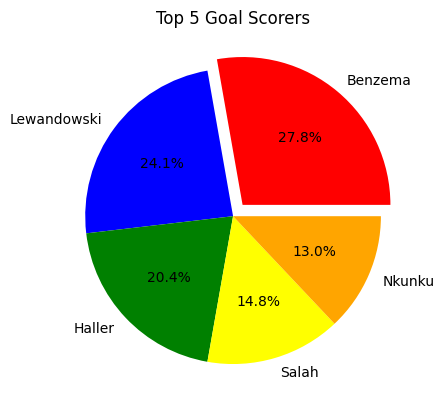

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include top 5 goal scorers
top_scorers = df.nlargest(5, 'goals')

# Create the explode values to offset the slices
explode = (0.1, 0, 0, 0, 0)

# Create the pie chart with numeric values
plt.pie(top_scorers['goals'], labels=top_scorers['player_name'], colors=['red', 'blue', 'green', 'yellow', 'orange'], explode=explode, autopct='%1.1f%%')

# Add a title
plt.title('Top 5 Goal Scorers')

# Display the chart
plt.show()

Text(0.5, 1.0, 'Goals scored from different players of different positions')

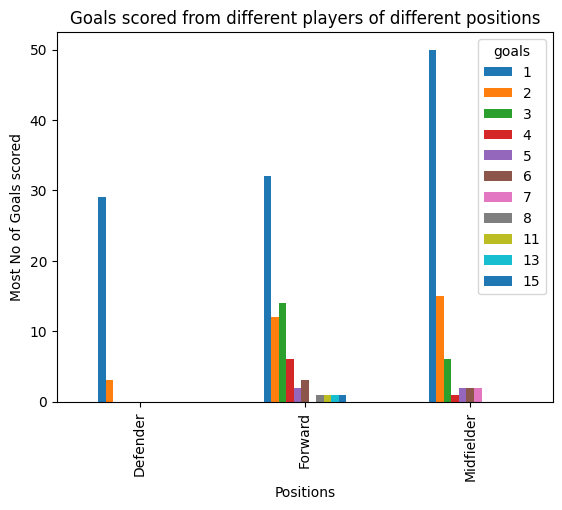

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pos=df.groupby("position")['goals'].value_counts().unstack()
pos.plot(kind='bar')
plt.xlabel('Positions')
plt.ylabel('Most No of Goals scored')
plt.title("Goals scored from different players of different positions")



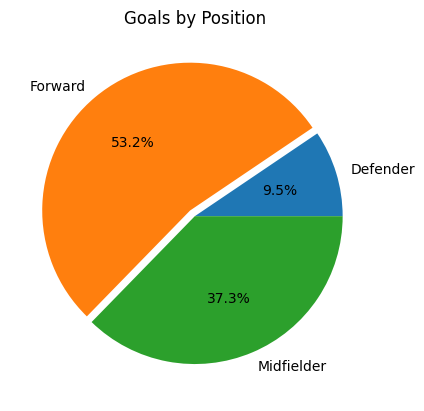

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by position and count the goals
pos = df.groupby("position")['goals'].sum()

# Find the position with the most goals
most_goals_pos = pos.idxmax()

# Create the explode values to highlight the position with the most goals
explode = [0.05 if p == most_goals_pos else 0 for p in pos.index]

# Create the pie chart with labels and numbers
plt.pie(pos, labels=pos.index, explode=explode, autopct='%1.1f%%')

# Add a title
plt.title('Goals by Position')

# Display the chart
plt.show()

In [ ]:
import pandas as pd

# Find the top 5 rows based on 'left_foot' column
top = df.nlargest(5, 'left_foot')

# Group the DataFrame by 'left_foot' column and count occurrences
left_counts = df['left_foot'].value_counts()

print(left_counts)


0    105
1     55
2      9
3      8
4      3
5      2
8      1
Name: left_foot, dtype: int64


In [ ]:
df.head

<bound method NDFrame.head of      serial     player_name         club    position  goals  right_foot  \
0         1         Benzema  Real Madrid     Forward     15          11   
1         2     Lewandowski       Bayern     Forward     13           8   
2         3          Haller         Ajax     Forward     11           3   
3         4           Salah    Liverpool     Forward      8           0   
4         5          Nkunku      Leipzig  Midfielder      7           3   
..      ...             ...          ...         ...    ...         ...   
178      73         Yansané      Sheriff     Forward      1           0   
179      73     Yakhshiboev      Sheriff     Forward      1           0   
180      73  Messias Junior        Milan     Forward      1           0   
181      73          Morato      Benfica    Defender      1           0   
182      73     Pedro Porro  Sporting CP    Defender      1           0   

     left_foot  headers  others  inside_area  outside_areas  penaltie

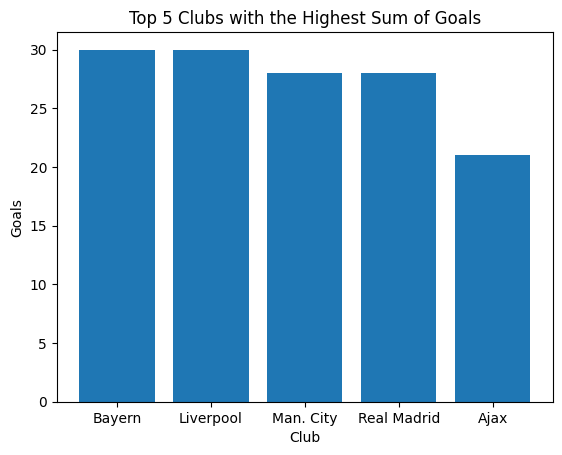

club
Bayern         30
Liverpool      30
Man. City      28
Real Madrid    28
Ajax           21
Name: goals, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'club' and calculate the sum of 'goals'
sum_goals_by_club = df.groupby('club')['goals'].sum()

# Sort the clubs by the sum of goals in descending order and select the top 5 clubs
top_5_clubs = sum_goals_by_club.nlargest(5)

# Plotting the bar chart
plt.bar(top_5_clubs.index, top_5_clubs.values)
plt.xlabel('Club')
plt.ylabel('Goals')
plt.title('Top 5 Clubs with the Highest Sum of Goals')

plt.show()

print(top_5_clubs)

In [ ]:
# prompt: player with the most only left foot goals

df.groupby('player_name')['left_foot'].sum().reset_index().nlargest(1, 'left_foot')




,player_name,left_foot
150,Salah,8


In [ ]:
# prompt: player with the most only right foot goals

df.groupby('player_name')['right_foot'].sum().reset_index().nlargest(1,'right_foot')

,player_name,right_foot
15,Benzema,11


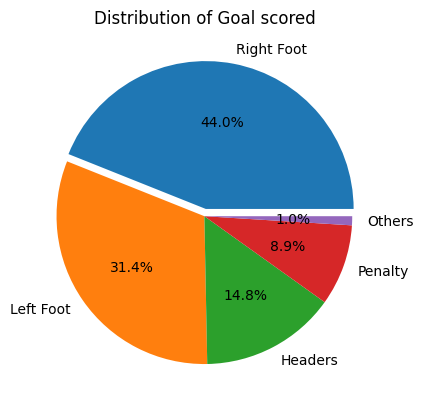

In [ ]:
import matplotlib.pyplot as plt

# Assuming `df` is your dataframe with columns "right_foot", "left_foot", "headers", "penalty", and "others"
# Calculate the count of each attribute
attribute_counts = [
    df['right_foot'].sum(),
    df['left_foot'].sum(),
    df['headers'].sum(),
    df['penalties'].sum(),
    df['others'].sum()
]

# Define attribute labels
attribute_labels = ['Right Foot', 'Left Foot', 'Headers', 'Penalty', 'Others']

# Create the explode values to offset the slices
explode = (0.05, 0.0, 0, 0, 0)

# Create pie chart
plt.pie(attribute_counts, labels=attribute_labels,explode=explode, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Goal scored')

# Display the pie chart
plt.show()




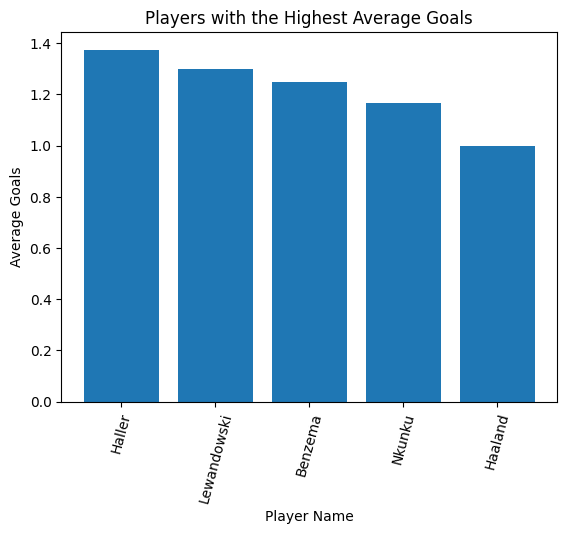

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# Calculate the average goals per match
df['avg_goals'] = df['goals'] / df['match_played']

# Identify the top 5 players with the highest average goals
top_players = df.nlargest(5, 'avg_goals')

# Create a bar plot using matplotlib
plt.bar(top_players['player_name'], top_players['avg_goals'])

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Player Name')
plt.ylabel('Average Goals')
plt.title('Players with the Highest Average Goals')

# Rotate x-axis labels if needed
plt.xticks(rotation=75)

# Show the plot
plt.show()


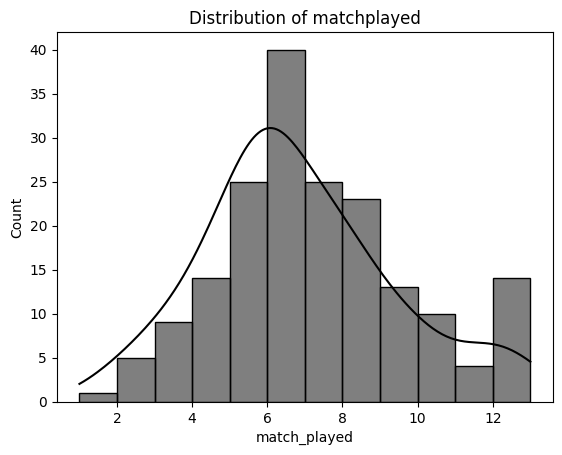

In [ ]:
#skewness of
sns.histplot(df['match_played'], kde=True, color='black', bins=12)
plt.title('Distribution of matchplayed')
plt.show()

In [ ]:
#finding the goals from open play by doing some arithmetic operations from existing attributes

df['open_play']=df['outside_areas']+ df['inside_area']-df['penalties']
print(df)

     serial     player_name         club    position  goals  right_foot  \
0         1         Benzema  Real Madrid     Forward     15          11   
1         2     Lewandowski       Bayern     Forward     13           8   
2         3          Haller         Ajax     Forward     11           3   
3         4           Salah    Liverpool     Forward      8           0   
4         5          Nkunku      Leipzig  Midfielder      7           3   
..      ...             ...          ...         ...    ...         ...   
178      73         Yansané      Sheriff     Forward      1           0   
179      73     Yakhshiboev      Sheriff     Forward      1           0   
180      73  Messias Junior        Milan     Forward      1           0   
181      73          Morato      Benfica    Defender      1           0   
182      73     Pedro Porro  Sporting CP    Defender      1           0   

     left_foot  headers  others  inside_area  outside_areas  penalties  \
0            1        3  

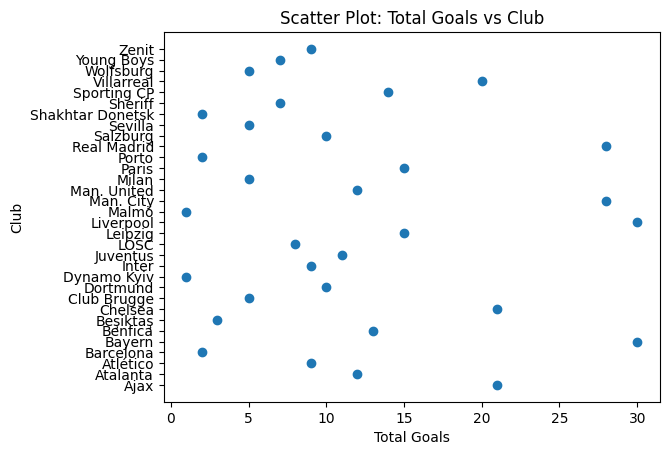

In [ ]:
# Scatter plot to compare the total goals scored by clubs

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the sum of goals for each club
club_goals = df.groupby('club')['goals'].sum().reset_index()

# Create a scatter plot
plt.scatter(club_goals['goals'], club_goals['club'])

# Set labels for the x-axis and y-axis
plt.xlabel('Total Goals')
plt.ylabel('Club')

# Set a title for the plot
plt.title('Scatter Plot: Total Goals vs Club')

# Display the scatter plot
plt.show()

<ipython-input-30-d0574566699b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

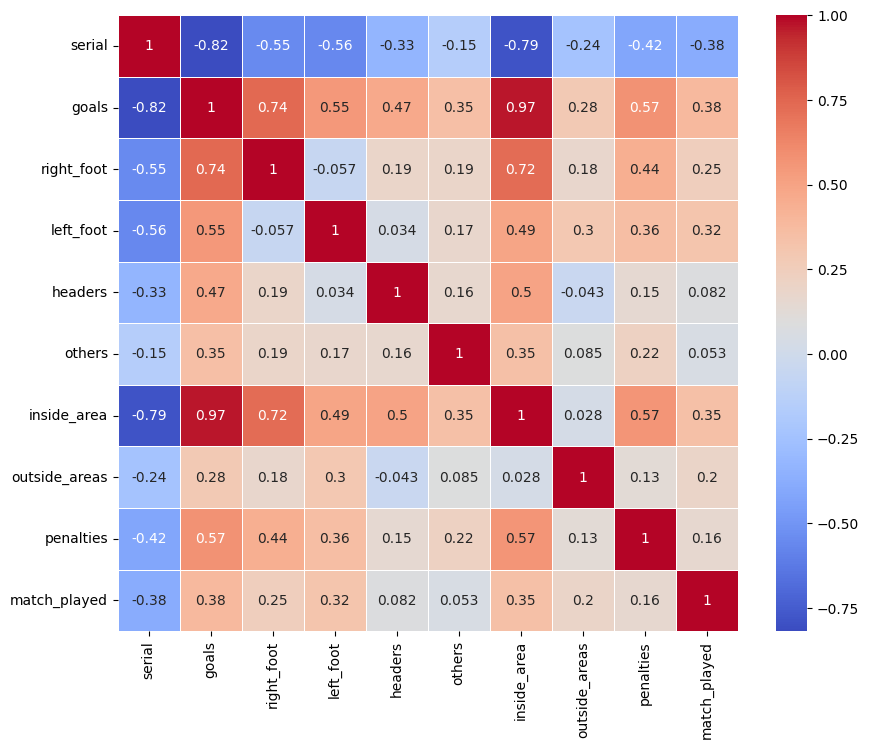

In [ ]:
# creating a heatmap to correlate the different attributes between each other

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a figure with a specific size
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Text(0.5, 1.0, 'Box Plot of Goals')

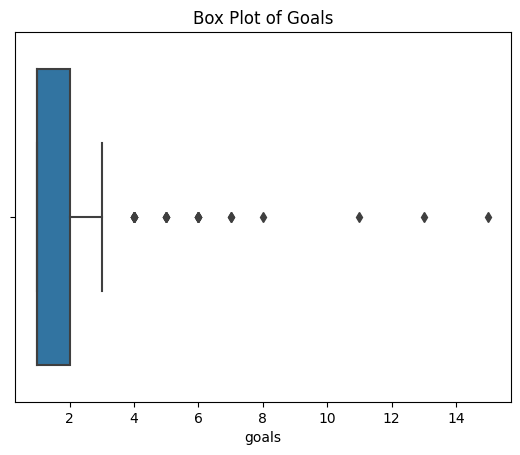

In [ ]:
# ploting the boxplot to find the outliers present in the attributes'goals'.

sns.boxplot(x=df['goals'])
plt.title('Box Plot of Goals')